In [ ]:
## TA COMMENTS: 96

Important variables common to most questions :

1. df = original data frame
2. unique_restaurants = data frame that contains unique values on the "RESTAURANT" column of the original data frame.


In [41]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv("NYC_Restaurants.csv", dtype=unicode)      #replace the first parameter with the path where the csv is stored


Populating the interactive namespace from numpy and matplotlib


Q1 Create a unique name for each restaurant.

Method - I am going to select the respective columns that I want in my new column in the data frame, from the original data and using the + symbol to concatenate them into one new column called "RESTAURANT" in the data frame. I will create a space between the values from each column with " " for better readibility.

In [42]:
df["RESTAURANT"] = df["DBA"]+" "+ df["BUILDING"]+" "+df["STREET"]+" "+df["ZIPCODE"]
df["RESTAURANT"].ix[:10]

0                     WENDY'S 469 FLATBUSH AVENUE 11225
1                     WENDY'S 469 FLATBUSH AVENUE 11225
2                     WENDY'S 469 FLATBUSH AVENUE 11225
3                     WENDY'S 469 FLATBUSH AVENUE 11225
4                     WENDY'S 469 FLATBUSH AVENUE 11225
5                TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6                TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7                TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8                TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9     BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
10    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Q2 How many restaurants are included in the data?
Method - I am assuming that we just want the count of unique restaurants. For, this I am going to take the unique values from the original df data frame with the unique() function applied on the "RESTAURANT" column I created above.

In [43]:
len(df["RESTAURANT"].unique())

10114

Q3 Number of chain restaurants? 
Method - Here, I first drop duplicates based on the RESTAURANT and store the data in a new data frame called names_restaurant. Then I group the data based on DBA by the groupby function into a series called chain. I create a mask on the series by choosing those values of restaurants that have a value greater than 1 and create another series built on this mask. 

In [44]:
#Getting the values of dba, building, street and zip code without duplicates
names_restaurant = df.drop_duplicates(subset = ["RESTAURANT"])
#Getting a series of restaurant name and number of restaurants 
chain = names_restaurant.groupby("DBA").size()
#creating a mask if the number of restaurants in that name bucket is greater than 1
mask = (chain > 1)
chain_restaurant = chain[mask]
print(len(chain_restaurant))         #number of restaurants that are chains

368


Q4, Bar graph of 20 most popular chains.

Method - I first sort the values of the chain_restaurant series obtained in the previous question and use the plot() function to plot the bar graph.

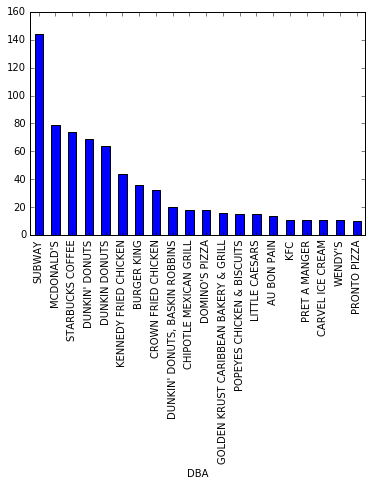

In [5]:
sorted_chain_restaurant = chain_restaurant.sort_values(axis = 0,ascending = False)
sorted_chain_restaurant[:20].plot(kind='bar')

Q5 Fraction of restaurants that are chains.
Method -I first calculate the number of unique restaurants by using the unique() on the "RESTAURANT" column. And then divide the length of the chain_restaurant series from the previous question by the len of the unique_restaurants series. 

Assumption - By "all restaurants" I am counting the DBA column in the unique restaurant data frame which would include the names of chains and non chain restaurants.

In [45]:
unique_restaurants = df.drop_duplicates(["RESTAURANT"])
chain_restaurant_names = chain_restaurant.index          #this list variable stores the names of all chain restaurants
all_chain_restaurant_names = unique_restaurants[unique_restaurants["DBA"].isin(chain_restaurant_names)]  #creating a new data frame if the name of the restaurant is in the chain restaurant list
fraction_of_chains = float(len(all_chain_restaurant_names))/float(len(unique_restaurants))
fraction_of_chains

0.16472216729286138

Q6 Non chain restaurants by boro.

Method - I first drop the duplicate values of restaurant and then get the value_counts() of each restaurant name based on the DBA column values. I create a mask on the chain_restaurant series which have a value of 1 ( this would be a non chain restaurant ). Then, I create a data frame from the original data frame by checking if the values in the DBA column in the original data frame and in the series created by the mask are matching. So this data frame created contains only those restaurants that are non chain. Missing values are identified by using a mask on comparision of the "BORO" value for the row to "Missing". The masking is done to set the "Missing" values to np.nan. 
The plots are based off the value_counts() on the "BORO" column of the non chain restaurants.

/home/akshata/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


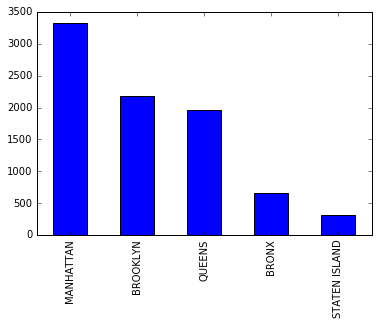

In [46]:
names_restaurant_boro = df.drop_duplicates(["RESTAURANT"])
chain_restaurant = names_restaurant_boro["DBA"].value_counts()
non_chain_mask = chain_restaurant == 1
df_non_chain = chain_restaurant[non_chain_mask]    #creating an index of non chain restaurants
df_non_chain_boro = df[df["DBA"].isin(df_non_chain.index)]
df_non_chain_boro_no_duplicates = df_non_chain_boro.drop_duplicates(["DBA"])
mask_missing = df_non_chain_boro_no_duplicates['BORO'] == 'Missing'
df_non_chain_boro_no_duplicates.ix[mask_missing,'BORO'] = np.nan
df_non_chain_boro_no_duplicates["BORO"].value_counts().plot(kind = "bar")


Q7 Fraction of non chain restaurants in each boro?

Method - Missing values are masked out using the same method used in the previous question. The fraction is calculated by dividing the value_counts() of the df_non_chain_boro_no_duplicates from the "BORO" column by the restaurant value_counts() by "BORO". 

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Name: BORO, dtype: float64


/home/akshata/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


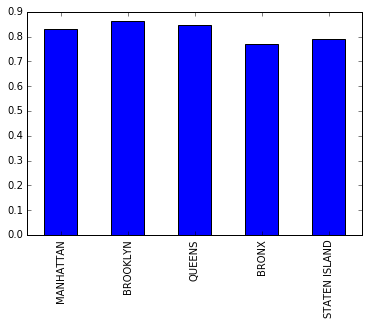

In [47]:
restaurants_by_boro = df.drop_duplicates(["RESTAURANT"])
mask_missing = restaurants_by_boro['BORO'] == 'Missing'
restaurants_by_boro.ix[mask_missing,"BORO"] = np.nan
restaurant = restaurants_by_boro["BORO"].value_counts()

fraction_non_chain = df_non_chain_boro_no_duplicates["BORO"].value_counts()/restaurant
print(fraction_non_chain)
fraction_non_chain.plot(kind = "bar")

## TA COMMENTS: Should sort in descending order before plotting (-0.5)

Q8 Which cuisines are most well represented among all restaurants? 

Method - I use the value_counts() to get the value counts for each cuisine description from the unique_restaurants data frame and then plot the series.

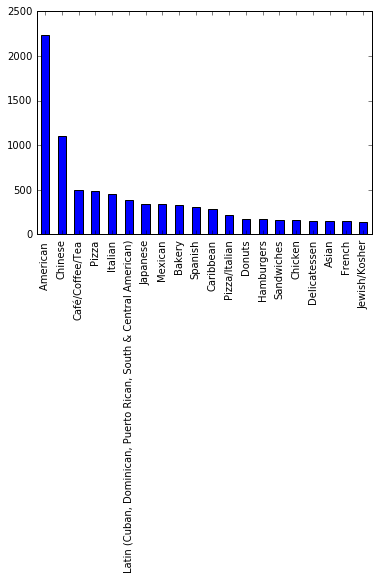

In [48]:
unique_restaurants = df.drop_duplicates(["RESTAURANT"])
cuisines = unique_restaurants["CUISINE DESCRIPTION"].value_counts()
cuisines[:20].plot(kind = "bar")

Q9 Plot the cuisines which never got cited for violations. 

Method - I initially create a data frame using crosstab of "violation code" and "restaurant" by exploiting the property that crosstab does not take rows with missing values. So, in this "crosstab"ed data frame, I am sure to get those restaurants that definitely had a violation. I store the names of all restaurants from the original "df" data frame in a list. Iterating through the names of the restaurants in the "crosstab"ed data frame, I append into a "violations_list", the names of the restaurants that are in the crosstab data frame ( so these are the names of the restaurants that have a violation ). Then, I create a mask on the unique_restaurants data frame by checking if the values in the restaurant column are in the violations_list I just created. Using the ~ operator for negating my mask, I take the value counts on the cuisine description from the new data frame created using this mask. Plotting is done on the series subsequently obtained.


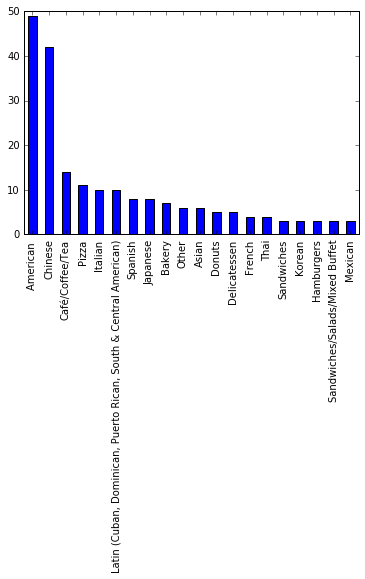

In [49]:
crosstab_violation_restaurant = pd.crosstab(df["VIOLATION CODE"],df["RESTAURANT"])        #rows contain the restaurant and column contains violation code
#this dataframe contains all the names of the restaurant that definitely have a violation ( so it includes the cases where the restaurant has a null in it's violation code for a particular cuisine and has a not null value for some other cuisine)
#it does not have the restaurant names that have null value.
to_del = pd.crosstab(df["RESTAURANT"],df["VIOLATION CODE"])

list_of_restaurant = list(df["RESTAURANT"])           #creating a list of all restaurant column values

violations_list = []                                  #the values that are appended to this list are all those restaurant values that have a violation

for i in crosstab_violation_restaurant:
    if i in list_of_restaurant:
        violations_list.append(i)                    #appending restaurant values for those that have a violation

## TA COMMENTS: Could have figured out the list of restaurants with a violation via
##              df['VIOLATION CODE'].notnull()  (-0.5)

no_violations_restaurant = unique_restaurants[~unique_restaurants["RESTAURANT"].isin(violations_list)]   #creating a mask where the restaurant value from the unique_restaurant data frame is not in the restaurant violation list
no_violations_cuisine = no_violations_restaurant["CUISINE DESCRIPTION"].value_counts()
no_violations_cuisine[:20].plot(kind = "bar")          #creating the plot

Q10 What cuisines tend to be the cleanest?
Method - Create a mask for those cuisines that have frequencies greater than 20 on the series from the value counts of the unique_restaurants data frame. Then select those cuisines from the original data frame which have the violation code as null. Create a ratio of frequencies that have a violation code as null and a frequency of the high_freq_cuisine variable which stores a count of the frequencies of the top 20 unique cuisines. 

Assumption - I am taking the value_counts() of the CUISINE DESCRIPTION from the unique_restaurants data column to eliminate duplicates in the RESTAURANT column of the data frame. And then, I test these values of the cuisine description from the Series high_freq_cuisine created against, the values of the cuisine description from the original data set to account for all the cuisine descriptions for all the restaurants in the data set. 

In [72]:
high_freq_cuisine = unique_restaurants["CUISINE DESCRIPTION"].value_counts()
mask = high_freq_cuisine >= 20
high_freq_cuisine = high_freq_cuisine[mask]

high_freq_cuisine_df = df[df["CUISINE DESCRIPTION"].isin(high_freq_cuisine.index)]
mask_no_violations = high_freq_cuisine_df["VIOLATION CODE"].isnull()
high_freq_no_violations = high_freq_cuisine_df[mask_no_violations]
ratio_violations = high_freq_no_violations["CUISINE DESCRIPTION"].value_counts()/high_freq_cuisine
top_10 = ratio_violations.sort_values(axis = 0, ascending = False)[:10]
top_10


Bangladeshi                      0.150000
Peruvian                         0.142857
Barbecue                         0.142857
Russian                          0.111111
Soups & Sandwiches               0.095238
Continental                      0.095238
Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
French                           0.089655
Tex-Mex                          0.086207
Name: CUISINE DESCRIPTION, dtype: float64

Q11 Most common violations in each boro
Method - First, I get the violation description and boro into separate data frames respectively. Then I apply the crosstab() function on them and get the max value out of each boro accessed by idxmax() function

In [57]:
violation_description = df["VIOLATION DESCRIPTION"]
boro = df["BORO"]
violation_description_by_boro = pd.crosstab(violation_description,boro)
violation_description_by_boro.idxmax()


BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

Q12 Most common violations per borough,after normalizing for the relative abundance of each violation

Method - I use the Series.divide() function to divide each boro violation descriptions with the total frequency of violation description. Violation freq is using the data frame from the previous question to get the value counts of the "VIOLATION DESCRIPTION" column.

In [58]:
violation_freq = violation_description.value_counts()

bronx_violations = violation_description_by_boro["BRONX"]
bronx_normalized = bronx_violations.divide(violation_freq)
print "Bronx - ", bronx_normalized.idxmax()

brooklyn_violations = violation_description_by_boro["BROOKLYN"]
brooklyn_normalized = brooklyn_violations.divide(violation_freq)
print "Brooklyn - ", brooklyn_normalized.idxmax()

manhattan_violations = violation_description_by_boro["MANHATTAN"]
manhattan_normalized = manhattan_violations.divide(violation_freq)
print "Manhattan - ", manhattan_normalized.idxmax()

queens_violations = violation_description_by_boro["QUEENS"]
queens_normalized = queens_violations.divide(violation_freq)
print "Queens - ", queens_normalized.idxmax()

staten_violations = violation_description_by_boro["STATEN ISLAND"]
staten_normalized = staten_violations.divide(violation_freq)
print "Staten Island - ", staten_normalized.idxmax()

## TA COMMENTS: Can just do idxmax for whole crosstab dataframe, after applying
##              the divide function. Printing for each boro becomes unwieldy
##              if you have lots of boros (-1)

Bronx -  Unprotected food re-served.
Brooklyn -  Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.
Manhattan -  Out-of package sale of tobacco products observed.
Queens -  Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.
Staten Island -  Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.


Q13 How many phone area codes correspond to a single zip code

Method - After storing the phone and zipcode columns into a data frame from the unique_restaurants data frame, I extract the first three letters from the phone column and store in the "area_code" variable. I create a cross tab of the area code and zip code. After storing the indexes into the area_zip_crosstab, I iterate through the list of area codes index and then count the values of zip codes for each area code. Then, using this list, I calculate the values of all area codes that have only one zip in it's corresponding list of zip codes. 

In [59]:
area_zip_df = unique_restaurants[["PHONE","ZIPCODE"]]
area_code = area_zip_df["PHONE"].str[:3]
zip_code = area_zip_df["ZIPCODE"].value_counts()
area_zip_crosstab = pd.crosstab(area_code,area_zip_df["ZIPCODE"])
indexes = area_zip_crosstab.index             #making an index of area codes
sum_phone_single_zip = 0
for i in indexes:                             #for each area code in the index, create a list of f
    list_of_zip = []
    zip_code_series = area_zip_crosstab.ix[i]               #access the zip codes of area code i in series
    for j in range(len(zip_code_series)):
        if zip_code_series[j]!=0:                          #if the zip code exists for the area code i 
            list_of_zip.append(zip_code_series[j])
    if len(list_of_zip) == 1:                          #if the area code is associated with only a single zip code, i.e, the list contains only one value
        sum_phone_single_zip+=1              #take a sum of all area codes that have only a single zip code in its list
sum_phone_single_zip

## TA COMMENTS: This can be done in a manner similar to the way you chose chains versus non-chains
##              You don't want to iterate over the index. (-1)

34

Q14 a,b,c Create the STREET TYPE, STREET BASE and STREET BASE & ZIP columns. 

Method - I first create a street type column after extrating the last word from the "STREET" column in the unique_restaurants data frame and then create a "STREET BASE" column from the words except the last word in the "STREET" column. Regular expressions are used to split the words into list after removing unwanted characters and create a string out of the list. The "STREET BASE ZIP" column is subsequently created by concatenating the STREET BASE and ZIPCODE columns.

In [60]:
import re

#this function takes the string containing the words except the last word and removes all unwanted empty spaces in between each word, appends it to a list and returns the list

def split_words(s):
    no_last_word = []
    for i in s:    
        if i!= "":
            no_last_word.append(i)
    return no_last_word

last_word_df = pd.DataFrame()
last_word = unique_restaurants["STREET"].str.split().str[-1]
last_word_df["STREET TYPE"] = last_word
not_last_word = unique_restaurants["STREET"].str.split().str[:-1]
not_last_word = map(str,not_last_word)
for i in range(len(not_last_word)):
    not_last_word[i] = not_last_word[i].strip("[]")
    not_last_word[i] = not_last_word[i].strip(",")
    not_last_word[i] = re.split("\W",not_last_word[i])
    not_last_word[i] = split_words(not_last_word[i])
    not_last_word[i] = ' '.join(not_last_word[i])
last_word_df["STREET BASE"] = not_last_word
last_word_df["STREET BASE ZIP"] = last_word_df["STREET BASE"] + " " + unique_restaurants["ZIPCODE"]


Q 14 Part d - Removing instances or duplicates where street base is empty
Creating a mask based on values of the column "Street base" if STREET BASE is having an empty string in its column, dropping duplicates from masked data frame on STREET TYPE and STREET BASE.

In [61]:
last_word_df_new = last_word_df
mask = last_word_df_new["STREET BASE"]!= ""
no_empty_base = last_word_df_new[mask]
no_empty_base = no_empty_base.drop_duplicates(["STREET TYPE","STREET BASE"])
no_empty_base

,STREET TYPE,STREET BASE,STREET BASE ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
24,AVENUE,CHURCH,CHURCH 11218
26,AVENUE,3,3 11209
30,STREET,EAST 74,EAST 74 10021
31,WEST,PROSPECT PARK,PROSPECT PARK 11215
41,AVENUE,COLUMBUS,COLUMBUS 10025


Q14 Part e - Merge the table on itself on street base and zip column.
Method - Merging the table on itself on the "Street base and zip" column using pd.merge() function 

In [62]:
merged_table = pd.merge(no_empty_base,no_empty_base,left_on = "STREET BASE ZIP", right_on = "STREET BASE ZIP")
merged_table

,STREET TYPE_x,STREET BASE_x,STREET BASE ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,ROAD,63,63 11374,ROAD,63
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
4,DRIVE,63,63 11374,DRIVE,63
5,BOULEVARD,ASTORIA,ASTORIA 11369,BOULEVARD,ASTORIA
6,AVENUE,SUTTER,SUTTER 11208,AVENUE,SUTTER
7,HIGHWAY,KINGS,KINGS 11223,HIGHWAY,KINGS
8,AVENUE,CHURCH,CHURCH 11218,AVENUE,CHURCH
9,AVENUE,3,3 11209,AVENUE,3


Q 14 part f - Selecting only rows where the street type is different in the merged table
Method - using the mask to select rows where the street types ( STREET_x, STREET_y from merged_table ) are not the same and then applying the mask to the merged table

In [63]:
mask = merged_table["STREET TYPE_x"]!=merged_table["STREET TYPE_y"]
diff_street_type = merged_table[mask]
diff_street_type

,STREET TYPE_x,STREET BASE_x,STREET BASE ZIP,STREET TYPE_y,STREET BASE_y
2,ROAD,63,63 11374,DRIVE,63
3,DRIVE,63,63 11374,ROAD,63
12,WEST,PROSPECT PARK,PROSPECT PARK 11215,W,PROSPECT PARK
13,W,PROSPECT PARK,PROSPECT PARK 11215,WEST,PROSPECT PARK
20,BOULEVARD,VICTORY,VICTORY 10314,BLVD,VICTORY
21,BLVD,VICTORY,VICTORY 10314,BOULEVARD,VICTORY
26,J,AVENUE,AVENUE 11230,M,AVENUE
27,J,AVENUE,AVENUE 11230,H,AVENUE
28,M,AVENUE,AVENUE 11230,J,AVENUE
30,M,AVENUE,AVENUE 11230,H,AVENUE


Q 14 part g - Crosstabulation of the different street types.
Method - Using crosstab function to get a table of frequency of the different street types on "unique street base and zip column"

In [64]:
crosstab_street_type = pd.crosstab(diff_street_type["STREET TYPE_x"], diff_street_type["STREET TYPE_y"])
crosstab_street_type.head(5)

STREET TYPE_y,A,AIRPOR,AIRPORT,AVE,AVENUE,AVEUE,B,BLVD,BOULEARD,BOULEVARD,...,SREET,ST,STATION,STREET,SW,TERMINAL,U,V,W,WEST
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPOR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,0,0,0,54,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AVENUE,0,0,0,54,0,1,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


Q 14 part g - Finding the most commonly occuring street type that occurs with - AVE, ST, RD, PL, BOULEARD and BULEVARD 
Method : Using a list to store the names asked in the question and using a dictionary to create a map between these names and the maximum occuring name  by using the idxmax() on the crosstab_street_type obtained from the previous question.

In [65]:
list_street_type = ["AVE","ST","RD","PL","BOULEARD","BULEVARD"]
max_street_type_dict = {}
for i in list_street_type:
    max_street_type_dict[i] = crosstab_street_type[i].idxmax()
max_street_type_dict
#crosstab_street_type["BLVD"]

## TA COMMENTS: Can just crosstab_street_type[list_street_type].idxmax() and avoid iteration (-1)

{'AVE': 'AVENUE',
 'BOULEARD': 'BOULEVARD',
 'BULEVARD': 'BLVD',
 'PL': 'PLACE',
 'RD': 'ROAD',
 'ST': 'STREET'}